# Clustering

aca anotar lo q se quiere probar

recordar utilizar metricas de comparación

https://huggingface.co/julien-c/distilbert-feature-extraction

CountVectorizer, TFIDF, LSA, LDA, SBERT, spaCy

ideas:
    (1,2) ngrams of Qpos + Apos   
    (1,2) ngrams of Qlemmas
    (1,2) ngrams of Alemmas
    (1,2) ngrams of AQAQlemmas


ya tengo el codigo para agregar features


In [39]:
from TCA import *

import pandas as pd
import numpy as np

df = pd.read_csv("db/features.csv", index_col=0)
df = df.set_index("id")

test_df = pd.read_csv("db/test_db.csv", index_col=0)
true_df = test_df[test_df["2"]]
false_df = test_df[test_df["2"] == False]



## Vectorial Representations

### CountVectorizers

### 2-3 ngrams in Question

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_selection import VarianceThreshold

def cv_ngrams(docs, range=(2,3), min_df=20):
    
    #2 y 3 ngrams, minimo 20 (no se como elegir le numero correcto)
    cv = CountVectorizer(min_df=min_df, ngram_range=range)

    
    #Create, Normalize and Reduce 
    vspace = cv.fit_transform(docs)
    vspace = normalize(vspace, axis=1, norm="max")
    vspace = VarianceThreshold(threshold=1e-3).fit_transform(vspace)

    return vspace

vs = cv_ngrams(df["Q"])
vs


<98182x704 sparse matrix of type '<class 'numpy.float64'>'
	with 338111 stored elements in Compressed Sparse Row format>

## clustering


### Implementando el metodo de elbow

In [47]:

#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

#https://scikit-learn.org/stable/modules/clustering.html
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,32))

visualizer.fit(vs)

n_clusters =  visualizer.elbow_value_

#visualizer.show()    
n_clusters

/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib

In [46]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=n_clusters, random_state=0)
kmc.fit(X=vs)
df["label1"] = kmc.labels_

#vemos los primeros clusters, al ser con ngrams  la forma en la que comienza la pregunta tiene mucho peso
def print_kmc_clus(n=5):
    import random
    q_clus = [[] for i in range(n_clusters)]

    for sentence_id, cluster_id in enumerate(kmc.labels_):
        q_clus[cluster_id].append(df.iloc[sentence_id].Q)

    for i, cluster in enumerate(q_clus):
        print("Cluster ", i+1)
        for tw in random.sample(cluster, n):
            print(tw)



<bound method BaseEstimator._check_feature_names of KMeans(n_clusters=11, random_state=0)>

## Meassuring "presition"

inertia, silhuete, own_metric


In [35]:

#Compara la cantidad de aciertos con los df de test
def check_results():

    n = len(true_df)
    m = len(false_df)
    same_c = 0
    for i in range(n):
        if int(df.loc[true_df.iloc[i][0]].label1) ==  int(df.loc[true_df.iloc[i][1]].label1):
            same_c += 1
    
    diff_c = 0
    for i in range(m):
        if int(df.loc[false_df.iloc[i][0]].label1) !=  int(df.loc[false_df.iloc[i][1]].label1):
            diff_c += 1
        
    return same_c/n, diff_c/m
        
check_results()
    

(0.6633535353535354, 0.6762467624676247)

### Implementando el metodo de elbow

/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/mauro/.local/lib

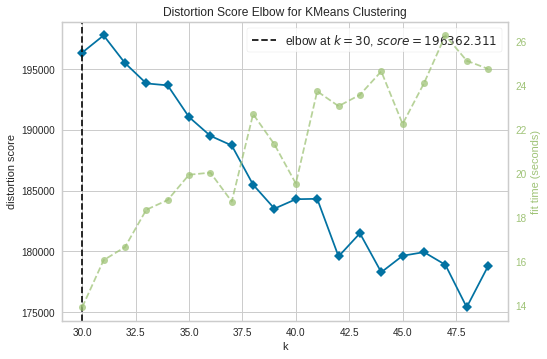

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:

#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(30,50))

visualizer.fit(vs)
visualizer.show()    

In [ ]:
#continuo viendo que funciona

#embeddings preentrenados
# import gensim.downloader

# #word2vec-google-news-300
# w2v = gensim.downloader.load('glove-twitter-25')
# w2v["mauro"]